In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from constants import BASE_DIR, PLOT_DIR

# Loading Data into Pandas frame

In [3]:
path = os.path.join(BASE_DIR,"data", "student_data_per_subject.xlsx")
sheet = "Sheet1"

studentsDataAllSubjects = pd.read_excel(path,sheet_name=sheet, header=[0,1,2], index_col=[0,1])

studentsDataAllSubjects

Unnamed: 2_level_0  \
                                                                    HF/NF   
Subject                                                Unnamed: 2_level_2   
0   "Evangelische Theologie"                                           HF   
1   "Evangelische Theologie"                                           NF   
2   "Judaistik"                                                        HF   
3   "Judaistik"                                                        NF   
4   "Katholische Theologie"                                            HF   
...                                                                   ...   
623 "Infection Biology and Control"                                    NF   
624 "Neural and Behavioural Sciences"                                  HF   
625 "Neural and Behavioural Sciences"                                  NF   
626 "Psychologie mit Schwerpunkt Klinische Psycholo...                 HF   
627 "Psychologie mit Schwerpunkt Klinische Psycholo...                 NF   

                                                       WiSe 2005/2006       \
                                                         Fachsemester        
Subject                                                             0    1   
0   "Evangelische Theologie"                                        0  121   
1   "Evangelische Theologie"                                        0   14   
2   "Judaistik"                                                     0    4   
3   "Judaistik"                                                     0    4   
4   "Katholische Theologie"                                         0   98   
...                                                               ...  ...   
623 "Infection Biology and Control"                                 0    0   
624 "Neural and Behavioural Sciences"                               0   16   
625 "Neural and Behavioural Sciences"                               0    0   
626 "Psychologie mit Schwerpunkt Klinische Psycholo...              0   14   
627 "Psychologie mit Schwerpunkt Klinische Psycholo...              0    0   

                                                                            \
                                                                             
Subject                                                  2   3   4   5   6   
0   "Evangelische Theologie"                            35  81  29  47  28   
1   "Evangelische Theologie"                             2   5   1   4   1   
2   "Judaistik"                                          0   0   0   0   0   
3   "Judaistik"                                          0   0   0   0   0   
4   "Katholische Theologie"                             13  34  32  40  22   
...                                                     ..  ..  ..  ..  ..   
623 "Infection Biology and Control"                      0   0   0   0   0   
624 "Neural and Behavioural Sciences"                    0   0   0   0   0   
625 "Neural and Behavioural Sciences"                    0   0   0   0   0   
626 "Psychologie mit Schwerpunkt Klinische Psycholo...   0   0   0   0   0   
627 "Psychologie mit Schwerpunkt Klinische Psycholo...   0   0   0   0   0   

                                                                ...  \
                                                                ...   
Subject                                                  7   8  ...   
0   "Evangelische Theologie"                            48  23  ...   
1   "Evangelische Theologie"                             0   2  ...   
2   "Judaistik"                                          0   0  ...   
3   "Judaistik"                                          0   0  ...   
4   "Katholische Theologie"                             36  20  ...   
...                                                     ..  ..  ...   
623 "Infection Biology and Control"                      0   0  ...   
624 "Neural and Behavioural Sciences"                    0   0  ...   
625 "Neur

In [8]:
allStudentsPerSemesterAndYear = studentsDataAllSubjects.sum(numeric_only=True)
allStudentsPerSemesterAndYear

                              Subject
WiSe 2005/2006  Fachsemester  0              7.0
                              1          11381.0
                              2           2553.0
                              3           5545.0
                              4           2352.0
                                          ...   
WiSe 2023/2024  Fachsemester  9           1564.0
                              10           361.0
                              11           921.0
                              12           206.0
                              >12         1778.0
Length: 518, dtype: float64

In [11]:
allStudentsPerSubject = studentsDataAllSubjects.sum(numeric_only=True, axis=1)
allStudentsPerSubject

0    "Evangelische Theologie"                                                  24306.0
1    "Evangelische Theologie"                                                   2277.0
2    "Judaistik"                                                                 489.0
3    "Judaistik"                                                                 589.0
4    "Katholische Theologie"                                                   14795.0
                                                                                ...   
623  "Infection Biology and Control"                                               0.0
624  "Neural and Behavioural Sciences"                                            16.0
625  "Neural and Behavioural Sciences"                                             0.0
626  "Psychologie mit Schwerpunkt Klinische Psychologie und Psychotherapie"       14.0
627  "Psychologie mit Schwerpunkt Klinische Psychologie und Psychotherapie"        0.0
Length: 628, dtype: float64

# First data exploration
To get a better understanding of the dataset we are going to do some simple analysis, which contains of the following plots

- line chart
- boxplot
- heatmap

With these basic plots we want to search for correlations in the data

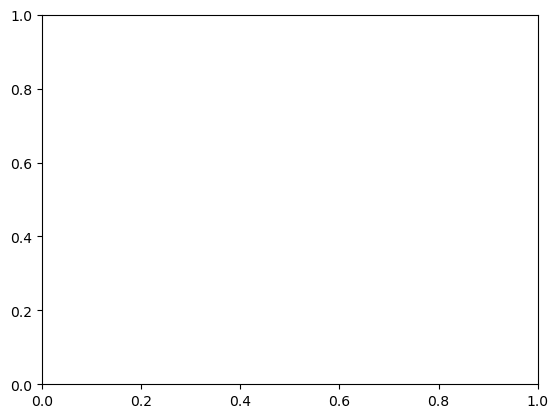

In [6]:
fig, ax = plt.subplots()


